In [38]:
from scraping import scraper
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'futura'

In [17]:
years = np.arange(2000, 2023)
scraper = scraper(years = [2022])
_ = scraper.fit()

... 2021-2022 ...  (1/1) ...


In [21]:
games = pd.read_csv('data_1980_2022.csv')

In [51]:
gamesq = games.copy()[(games['Game_home'] > 4) & (games['Game_away'] > 4) & (games['Rest'] < 20) & (games['Rest'] > -20)]

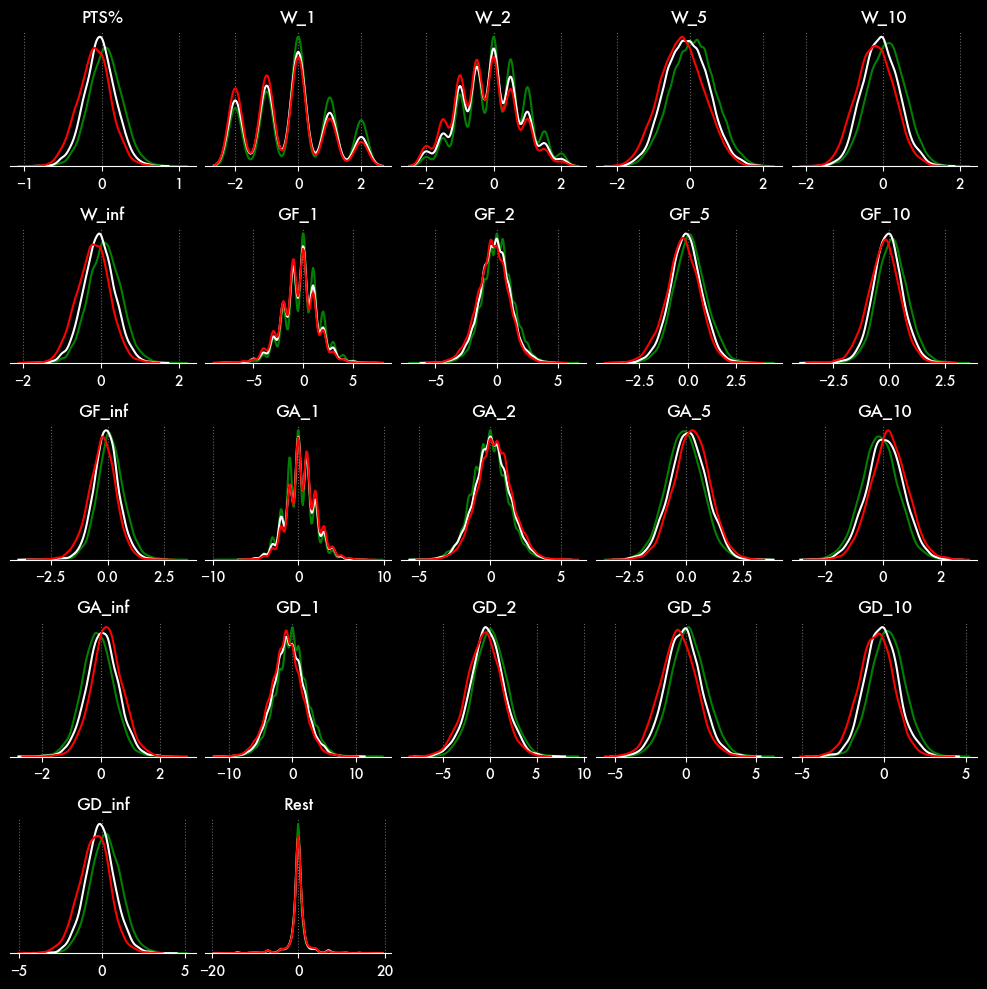

In [52]:
_, ax = plt.subplots(5, 5, figsize = (10,10), facecolor = 'black'); ax = ax.flatten()

for i, f in enumerate(games.columns[9:-3]) :

    df = gamesq.groupby('Result').get_group(1)
    sns.kdeplot(df[f], c = 'g', ax = ax[i])
    df = gamesq.groupby('Result').get_group(0)
    sns.kdeplot(df[f], c = 'white', ax = ax[i])
    df = gamesq.groupby('Result').get_group(-1)
    sns.kdeplot(df[f], c = 'r', ax = ax[i])
    ax[i].set_yticks([])
    ax[i].tick_params(axis = 'x', colors = 'white')
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_title(f, color = 'white')
    ax[i].set_facecolor('black')
    ax[i].spines['bottom'].set_color('white')#; ax.spines['top'].set_color('white')
    ax[i].grid(linestyle = ':', color = 'white', alpha = 0.4)

for j in np.arange(i+1, 25):
    ax[j].set_xticks([])
    ax[j].set_yticks([])
    ax[j].set_facecolor('black')

plt.tight_layout(h_pad = 1.0, w_pad = 0.1)
plt.show()

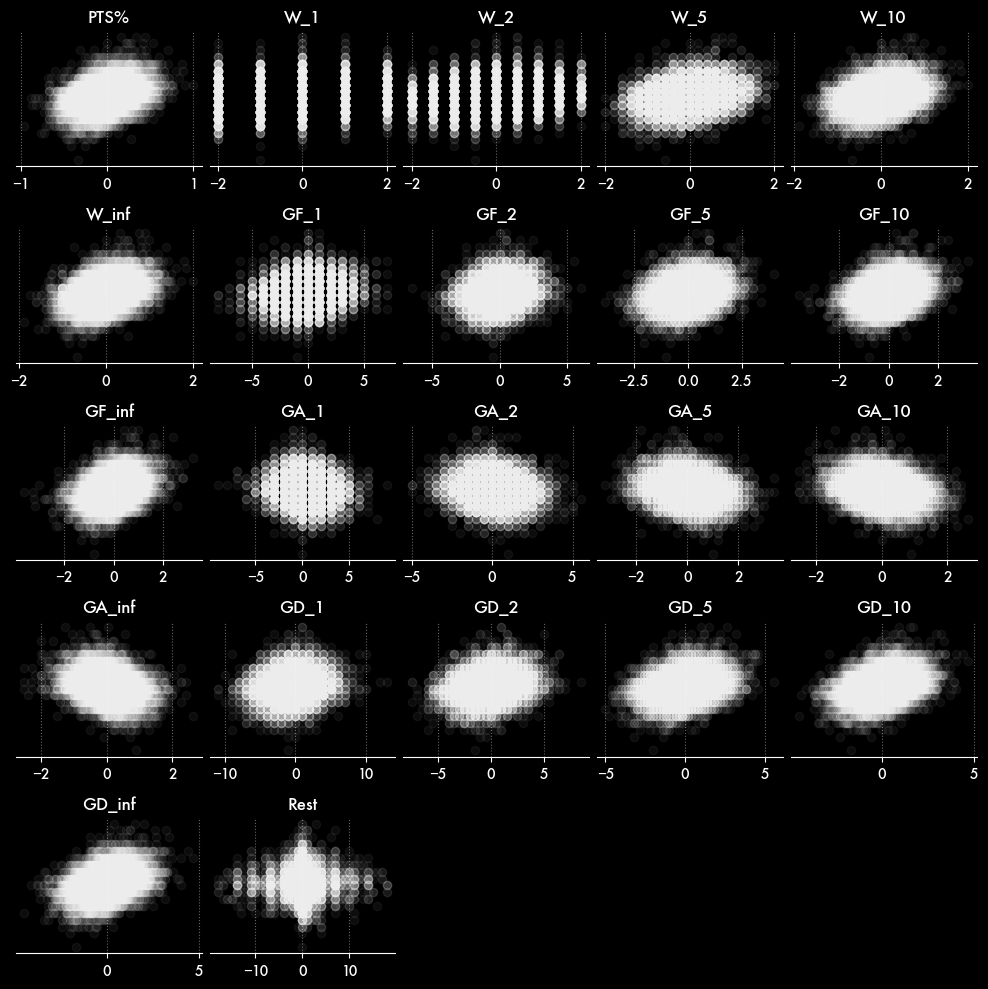

In [56]:
_, ax = plt.subplots(5, 5, figsize = (10,10), facecolor = 'black'); ax = ax.flatten()

for i, f in enumerate(games.columns[9:-3]) :

    ax[i].scatter(gamesq[f], gamesq['G_home'] - gamesq['G_away'], c = 'white', alpha = 0.05)
    ax[i].set_yticks([])
    ax[i].tick_params(axis = 'x', colors = 'white')
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_title(f, color = 'white')
    ax[i].set_facecolor('black')
    ax[i].spines['bottom'].set_color('white')#; ax.spines['top'].set_color('white')
    ax[i].grid(linestyle = ':', color = 'white', alpha = 0.4)

for j in np.arange(i+1, 25):
    ax[j].set_xticks([])
    ax[j].set_yticks([])
    ax[j].set_facecolor('black')

plt.tight_layout(h_pad = 1.0, w_pad = 0.1)
plt.show()